In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# import plotly as iplot
import nltk
from nltk.corpus import stopwords
import tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

C:\Users\Mick\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/14/2019,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,NaN,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",GA,31601,NaN,Consent not provided,Web,05/14/2019,Closed with explanation,Yes,NaN,3241328
1,05/14/2019,Checking or savings account,Other banking product or service,Incorrect information on your report,Information belongs to someone else,NaN,NaN,NAVY FEDERAL CREDIT UNION,TX,75089,NaN,NaN,Referral,05/14/2019,In progress,Yes,NaN,3242313
2,05/14/2019,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,NaN,"FLAGSTAR BANK, FSB",CA,923XX,Servicemember,NaN,Web,05/14/2019,In progress,Yes,NaN,3241344
3,05/14/2019,Debt collection,Payday loan debt,False statements or representation,"Impersonated attorney, law enforcement, or gov...",NaN,NaN,Red Cedar Associates LLC,OH,442XX,NaN,NaN,Web,05/14/2019,Closed with explanation,Yes,NaN,3242210
4,05/14/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"CMRE Financial Services, Inc.",CA,95827,NaN,NaN,Phone,05/14/2019,Closed with explanation,Yes,NaN,3242512


In [4]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
29502,"Credit reporting, credit repair services, or o...",I am a victim of identity theft. My personal i...,0
29616,"Credit reporting, credit repair services, or o...",I have reached out to All 3 credit bureaus and...,0
29660,"Credit reporting, credit repair services, or o...",I am a victim of identity theft. My personal i...,0
29772,"Credit reporting, credit repair services, or o...",On all credit agencies the same accounts are n...,0
30882,"Credit reporting, credit repair services, or o...",I have a student loan thats discharge and its ...,0


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# import plotly as iplot
import nltk
from nltk.corpus import stopwords
import tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('RelevantSection.csv')
df = data.sample(frac = 0.3)
df.head()

,Product,Consumer_complaint_narrative,category_id
15634,Student loan,"On XXXX XXXX, I received an email that my 12-m...",3
100855,Checking or savings account,"On XX/XX/XXXX, I logged into my account with N...",2
167470,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, there was an inquiry reque...",0
284932,Credit reporting,I am looking for help regarding inquires on my...,11
361851,Credit reporting,unauthorized inquiry on credit reports,11


Basic Exploratory Analysis

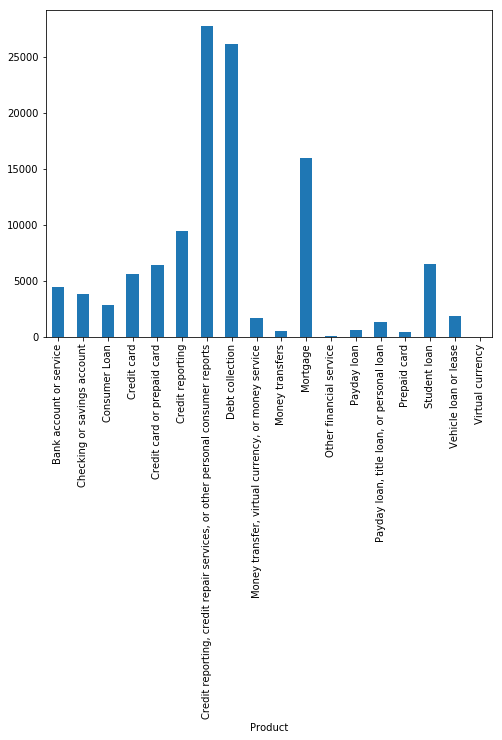

In [3]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
# plt.xticks(rotation==90)
plt.show()

Label consolidation:

Consolidate “Credit reporting” into “Credit reporting, credit repair services, or other personal consumer reports”.

Consolidate “Credit card” into “Credit card or prepaid card”.

Consolidate “Payday loan” into “Payday loan, title loan, or personal loan”.

Consolidate “Virtual currency” into “Money transfer, virtual currency, or money service”.

“Other financial service” has very few number of complaints and it does not mean anything, so, I decide to remove it.

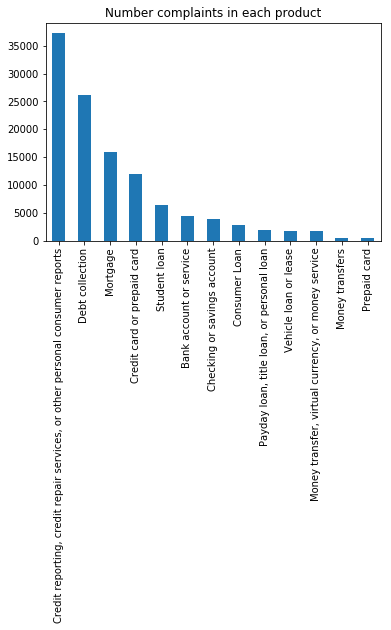

In [4]:
df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

df['Product'].value_counts().sort_values(ascending=False).plot(kind = 'bar',title='Number complaints in each product')

In [5]:
def print_comment(index):
    print(df[['Consumer_complaint_narrative', 'Product']].values[index][0])
    print('Product:', df[['Consumer_complaint_narrative', 'Product']].values[index][1])
    pass


print_comment(5)

Hello received a call a few months ago about a Consumer Debt reduction plan called XXXX XXXX XXXX to lower my dept by lowering the APR 's on my credit cards. I told the guy it really looked too expensive ( 5 payments of {$170.00} per month ). I asked if I could cancel at any time and the guy selling me the service I could at any time and texted me an ACH Payment Auth form that said if I wish to revoke this auth and cancel any scheduled debit to my account I can do so within 3 days of debit and to notify them at XXXX XXXX XXXX XXXX. They had me agree on the phone and they talk so fast and they said that should they not do their job I 'm entitled to a full refund. So I called in XX/XX/XXXX to cancel and the person said ok. On XX/XX/XXXX my account was debited. When I called this time. I could told I did a verbal commitment and could not cancel and they will continue to debit my account because ( I ) did not finish the business with them. They also told me they will report it to the credi

Perform the following text cleaning steps

In [6]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(clean_text)
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.replace('\d+', '')

In [7]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Consumer_complaint_narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 73928 unique tokens.


In [8]:
X = tokenizer.texts_to_sequences(df['Consumer_complaint_narrative'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (115069, 250)


In [9]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (115069, 13)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(103562, 250) (103562, 13)
(11507, 250) (11507, 13)


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, \
                     input_length=X.shape[1]))
# # model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.GRU(100, dropout=0.4, recurrent_dropout=0.4, return_sequences = True)))
model.add(layers.Bidirectional(layers.GRU(10, dropout=0.4, recurrent_dropout=0.4, return_sequences = True)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax', kernel_initializer = 'he_normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', \
              metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, \
                    batch_size=batch_size,validation_split=0.1,\
                    callbacks=[EarlyStopping(monitor='val_loss', \
                                             patience=3, \
                                             min_delta=0.0001)])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 93205 samples, validate on 10357 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
93205/93205 [==============================] - 563s 6ms/sample - loss: 1.2015 - acc: 0.6376 - val_loss: 0.8210 - val_acc: 0.7449
Epoch 2/10
93205/93205 [==============================] - 561s 6ms/sample - loss: 0.8805 - acc: 0.7379 - val_loss: 0.7571 - val_acc: 0.7621
Epoch 3/10
93205/93205 [==============================] - 558s 6ms/sample - loss: 0.7888 - acc: 0.7612 - val_loss: 0.7340 - val_acc: 0.7685
Epoch 4/10
93205/93205 [==============================] - 556s 6ms/sample - loss: 0.7332 - acc: 0.7740 - val_loss: 0.7269 - val_acc: 0.7703
Epoch 5/10
93205/93205 [==============================] - 555s 6ms/sample - loss: 0.6935 - acc: 0.7861 - val_loss: 0.7571 - val_acc: 0.7607
Epoch 6/10
9320

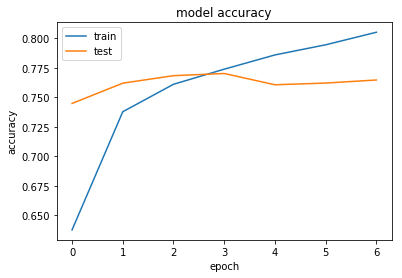

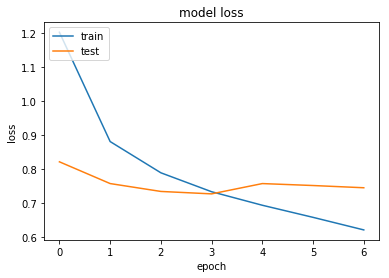

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

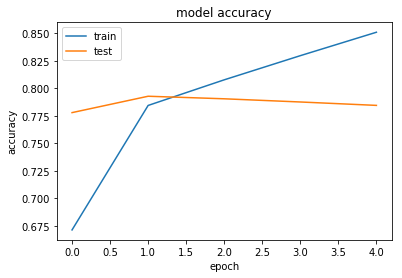

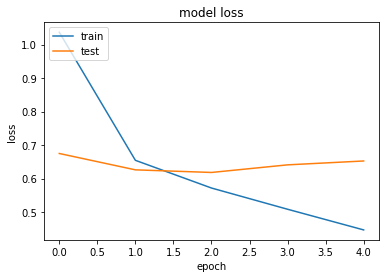

In [21]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# import plotly as iplot
import nltk
from nltk.corpus import stopwords
import tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
bbc = pd.read_csv('bbc-text.csv')
bbc.head()

def print_comment_bbc(index):
    print(bbc[['text', 'category']].values[index][0])
    print('Category:', bbc[['text', 'category']].values[index][1])
    pass

print_comment_bbc(50)

df_bbc = bbc.reset_index(drop = True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

lewsey puzzle over disallowed try england s josh lewsey has claimed he was denied a late try in his side s six nations loss to ireland.  the wasps wing insisted he grounded the ball when he was bundled over the line and said referee jonathan kaplan had made a wrong decision.  i m positive i touched the ball down over the line   lewsey told bbc sport.  it certainly wasn t a turnover.  i was driven over and i put the ball on the ground. the whistle went and i let go of the ball.  lewsey added:  one of the irish players scooped it back after the whistle and to our surprise the referee then gave a turnover.  as far as i m concerned  that incident and mark cueto s effort from charlie hodgson s cross-field kick that led to what looked like a good try were the two key elements in the game.   cueto was also puzzled as to why his try had been disallowed by kaplan.  i don t think i could have been offside for  without a doubt  i was behind the ball   said the sale player.  the move was a planned

In [3]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#   text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_bbc['text'] = df_bbc['text'].apply(clean_text)
df_bbc['text'] = df_bbc['text'].str.replace('\d+', '')

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_bbc['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 30201 unique tokens.


In [4]:
X = tokenizer.texts_to_sequences(df_bbc['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(df_bbc['category']).values
print('Shape of label tensor:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

from tensorflow.keras import layers
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, \
                     input_length=X.shape[1]))
# # model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.GRU(40, dropout=0.4, recurrent_dropout=0.4, return_sequences = True)))
model.add(layers.Bidirectional(layers.GRU(10, dropout=0.4, recurrent_dropout=0.4, return_sequences = True)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax', kernel_initializer = 'he_normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', \
              metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, \
                    batch_size=batch_size,validation_split=0.1,\
                    callbacks=[EarlyStopping(monitor='val_loss', \
                                             patience=3, \
                                             min_delta=0.0001)])

Shape of data tensor: (2225, 500)
Shape of label tensor: (2225, 5)
(2002, 500) (2002, 5)
(223, 500) (223, 5)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1801 samples, validate on 201 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1801/1801 [==============================] - 27s 15ms/sample - loss: 1.6546 - acc: 0.2493 - val_loss: 1.3328 - val_acc: 0.5721
Epoch 2/20
1801/1801 [==============================] - 27s 15ms/sample - loss: 1.1885 - acc: 0.4831 - val_loss: 0.6570 - val_acc: 0.8010
Epoch 3/20
1801/1801 [==============================] - 25s 14ms/sample - loss: 0.7125 - acc: 0.7263 - val_loss: 0.3041 - val_acc: 0.9453
Epoch 4/20
1801/1801 [==============================] - 25s 14ms/sample - loss: 0.3935 - acc: 0.8690 - val_loss: 0.0959 - val_acc: 0.9801
Epoch 5/20
1801/1801 [==============================] - 2

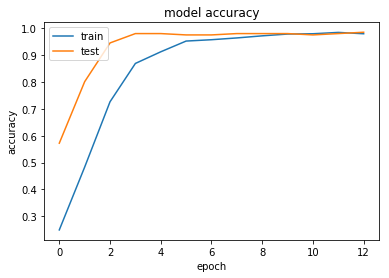

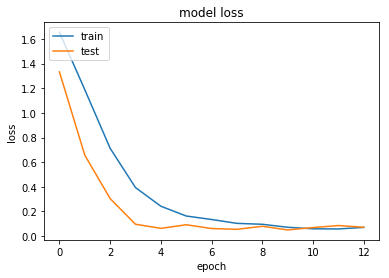

In [5]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()